In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://github.com/bipulshahi/Dataset/raw/refs/heads/main/Mall_Customers.xls')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df1 = df[['Age', 'Annual Income (k$)', 	'Spending Score (1-100)']]
df1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
X = df1.copy()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

#Linkage matix
Z = linkage(X , method = 'ward')

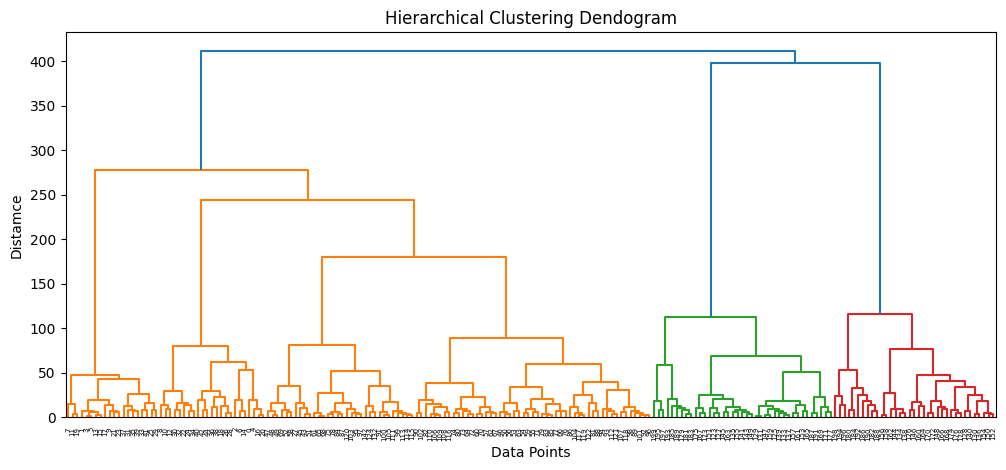

In [ ]:
#plot dendogram
plt.figure(figsize = (12,5))

dendrogram(Z)

plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Data Points')
plt.ylabel('Distamce')
plt.show()

In [ ]:
h_clustering = AgglomerativeClustering(
    n_clusters = 5,
    linkage = 'ward'
)

clusters = h_clustering.fit_predict(X)
df['Labels'] = clusters

In [ ]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [ ]:
df.groupby('Labels') [['Age', 	'Annual Income (k$)', 	'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Labels,,,
0,42.156627,54.759036,49.771084
1,41.685714,88.228571,17.285714
2,32.692308,86.538462,82.128205
3,24.850000,24.950000,81.000000
4,45.217391,26.304348,20.913043


**Use Hierarchical custering for country data**

In [ ]:
dfc = pd.read_csv('https://github.com/bipulshahi/Dataset/raw/refs/heads/main/Country-data.xls')
dfc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
